<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II

#  Trabajo semanal 3
#### Autor: Torres Alejandro
#### Legajo: 141884-1

## Consigna
<img src="./consigna.png" align="left" width="550" /> 


+ Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función. 
    **Recordar que**:
        $|T(jω)|2=T(jω)⋅T(−jω)=T(s)⋅T(−s)|s=jω$
        

+ Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.

+ Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.

+ Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.

+ Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.

**Bonus**:

+ +10 💎 Proponer un planteo alternativo a 1) usando la ωButter(ver Schaumann 6.4)
+ +10  ⚽️ Simulación numérica y circuital.
+ +10  🍺 Presentación en jupyter notebook

## Desarrollo manuscrito

## Simulación simbólica

In [47]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

In [61]:
s, ep, a, b, c = sp.symbols('s, ep, a, b, c')

In [121]:
#Módulos de la transferencia al cuadrado, función aproximación.
mtsc = 1/ep**2/(1/ep**2+s**6)
mtsc

1/(ep**2*(s**6 + ep**(-2)))

In [129]:
Ts = 1/(s**3+a*s**2+b*s+c) 
Tsc= 1/(-s**3+a*s**2-b*s+c)

In [131]:
poli = sp.Mul(Ts,Tsc)
poli

1/((a*s**2 - b*s + c - s**3)*(a*s**2 + b*s + c + s**3))

In [133]:
aa = sp.solve([  
                c**2-1/ep**2,
                2*a*c-b**2,
                a*2-2*b
                ], 
                [a, b, c])

aa

[(0, 0, -1/ep), (0, 0, 1/ep), (-2/ep, -2/ep, -1/ep), (2/ep, 2/ep, 1/ep)]

In [134]:
polynomial = s**3 + aa[3][0]*s**2 + aa[3][1]*s + aa[3][2]
polynomial

s**3 + 2*s**2/ep + 2*s/ep + 1/ep

In [136]:
polynomial = polynomial.subs(1/ep, 2)
polynomial

s**3 + 4*s**2 + 4*s + 2

## Simulación en python

In [2]:
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías

plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [23]:
# Definimos los parámetros de la simulación para un butterwoth de orden 3
Wp=1
Ws=2
alpha_max=1
alpha_min=12


In [25]:
eps = np.sqrt(10**(alpha_max/10)-1)
eps

0.5088471399095875

$\begin{equation}n = \frac{log(10^{\alpha_{min}/10} - 1) /\epsilon²)}{2 log(\omega_s)}\end{equation}$

In [34]:
n= (np.log((10**(alpha_min/10)-1)/eps**2))/(2*np.log(Ws))
n_r=np.round(n)
n_r

3.0

In [ ]:
#Cargamos la funcion transferencia como vectores de sus coeficientes.

#Función transferencia pasabajos máxima planicidad de orden 3. 
z,p,k = sig.buttap(n_r)
num_lp, den_lp = sig.zpk2tf(z,p,k)
num_lp_d, den_lp_d = sig.lp2lp(num_lp,den_lp, eps**(-1/n_r)) 

H1=sig.TransferFunction(num_lp_d,den_lp_d)

#### Cálculo directo de transferencia
$|T(s)|²= \frac{1/\epsilon²}{1/\epsilon²-s⁶}=\frac{1}{(s³+as²+bs+c)}\frac{1}{(-s³+as²-bs+c)}=T(s)*T(-s)$

$T(s)= \frac{2}{s³+4s²+4s+2} = \frac{2}{(s+1)(s²+2s+2)}$

In [82]:
round(1/(eps))

2

In [69]:
#Función transferencia pasabajos: |T(s)|²= T(s)*T(-s)
num2_lp = [2]
den2_lp = [1,4,4,2]

H2 = sig.TransferFunction(num2_lp,den2_lp)

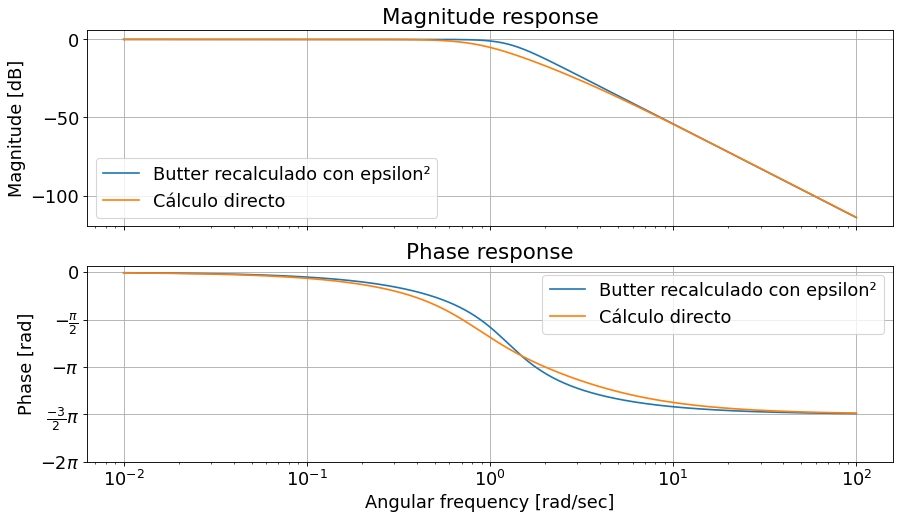

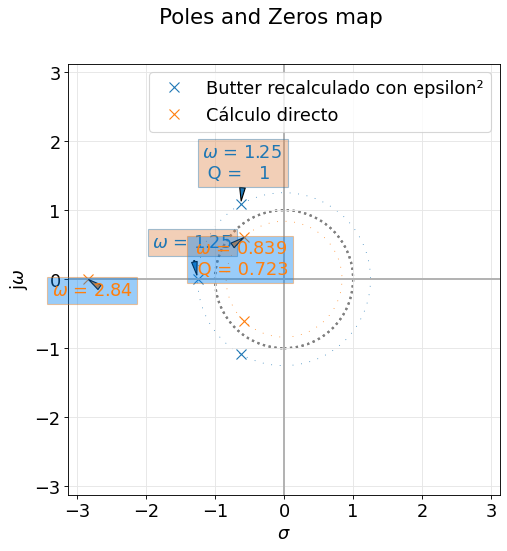

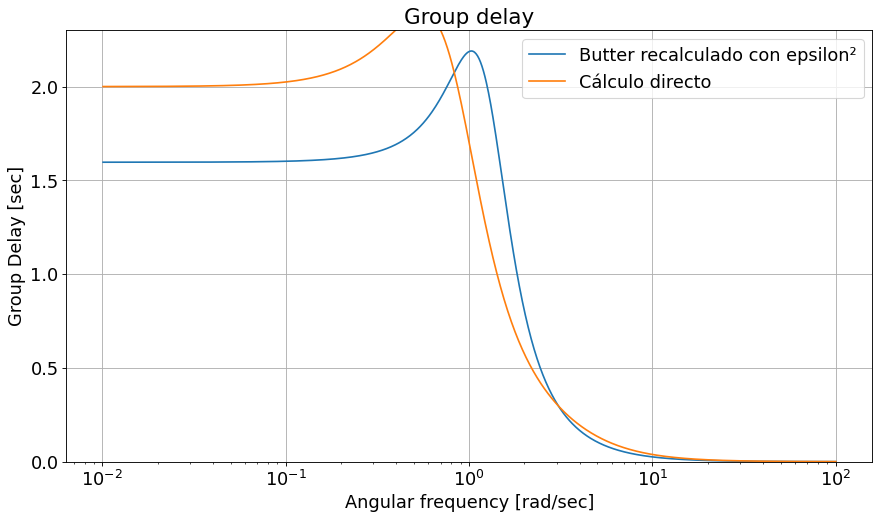

In [70]:
analyze_sys(H1,['Butter recalculado con epsilon²'])
analyze_sys(H2,['Cálculo directo'])

## Implementación circuital